In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['hacer', 'empezar', 'sonido', 'tenebroso', 'c...
1      ['música', 'ángel', 'chico', 'estáis', 'bienve...
2      ['chico', 'estáis', 'bienvenir', 'vídeo', 'dom...
3      ['probar', 'música', 'chico', 'dubái', 'increí...
4      ['apurado', 'noche', 'dubai', 'quedar', 'minut...
                             ...                        
195    ['chica', 'estar', 'bienvenido', 'vídeo', 'año...
196    ['chico', 'estar', 'bienvenido', 'vídeo', 'año...
197    ['magnífico', 'lohaber', 'ir', 'paquete', 'que...
198    ['martar', 'dimir', 'pasar', 'contento', 'carn...
199    ['ver', 'girado', 'ver', 'iluminado', 'bajar',...
Name: transcript, Length: 200, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 0.14
Total occurrences of 'xxxx' per transcript: 29.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
esperar gustar muchísimo: 78
estar bienvenido vídeo: 77
ver semana venir: 69
chico estar bienvenido: 56
vídeo esperar gustar: 55
música aplauso música: 47
bienvenido vídeo sábado: 43
vídeo sábado canal: 39
esperar gustar montón: 36
semana venir vídeo: 28
chica estar bienvenido: 26
música música música: 24
chico vídeo esperar: 24
gustar muchísimo vídeo: 24
súper súper súper: 21
chico esperar gustar: 19
sábado canal sábado: 18
aplauso música aplauso: 17
chico acabar llegar: 15
semana venir música: 14


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.020*"música" + 0.011*"vídeo" + 0.009*"chico" + 0.008*"querer" + 0.007*"ver" + 0.006*"hermano" + 0.006*"valer" + 0.006*"gustar" + 0.006*"comer" + 0.005*"foto"
Topic: 1, Words: 0.013*"súper" + 0.010*"música" + 0.010*"quedar" + 0.009*"gustar" + 0.009*"querer" + 0.009*"cosa" + 0.008*"ver" + 0.008*"vídeo" + 0.008*"poquito" + 0.007*"poner"
Topic: 2, Words: 0.025*"música" + 0.007*"súper" + 0.006*"poquito" + 0.006*"querer" + 0.006*"gustar" + 0.005*"gente" + 0.005*"chico" + 0.005*"vídeo" + 0.005*"encantar" + 0.005*"casa"
Topic: 3, Words: 0.012*"vídeo" + 0.012*"cosa" + 0.010*"gustar" + 0.009*"valer" + 0.009*"ver" + 0.008*"decir" + 0.008*"música" + 0.008*"súper" + 0.007*"chico" + 0.007*"pasar"
Topic: 4, Words: 0.020*"música" + 0.013*"vídeo" + 0.011*"gustar" + 0.010*"súper" + 0.010*"ver" + 0.008*"cosa" + 0.007*"chico" + 0.007*"querer" + 0.007*"pasar" + 0.007*"venir"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
valer: 8.747709055982027
poquito: 8.457345663718362
quedar: 7.800952435747889
pasar: 7.653497351006587
poner: 7.485549034322666
foto: 7.228858623618623
sabéis: 6.868433854212611
muchísimo: 6.16590693166335
encantar: 6.155779947522807
yo: 5.883596465289366


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('música', 1573), ('vídeo', 1131), ('súper', 966), ('gustar', 958), ('ver', 890), ('cosa', 872), ('querer', 750), ('valer', 704), ('chico', 698), ('poquito', 638), ('quedar', 625), ('decir', 610), ('pasar', 583), ('venir', 580), ('estar', 575)]
       Word  Frequency
0    música       1573
1     vídeo       1131
2     súper        966
3    gustar        958
4       ver        890
5      cosa        872
6    querer        750
7     valer        704
8     chico        698
9   poquito        638
10   quedar        625
11    decir        610
12    pasar        583
13    venir        580
14    estar        575


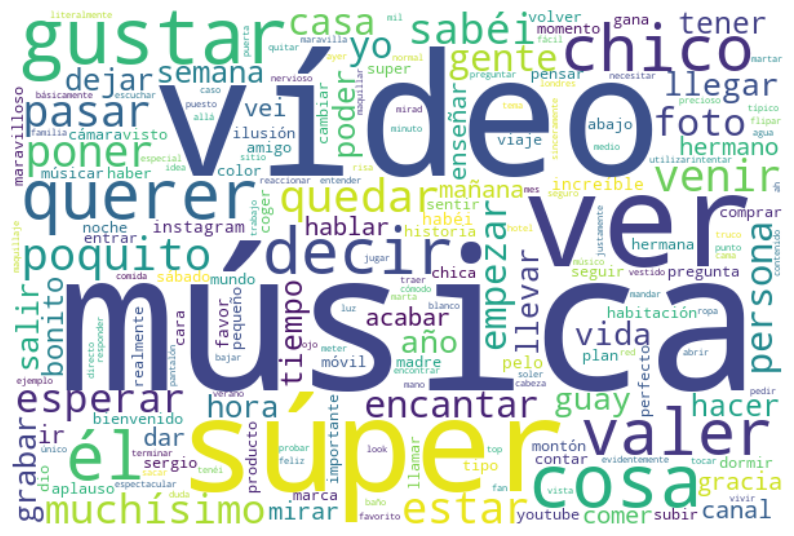

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()